In [70]:
import pandas as pd
speeds = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
coords = {}
for speed in speeds:
    df = pd.read_csv("data/data@%g.csv" % speed)
    df.columns = df.columns.str.strip()
    coords[speed] = df
speeds

[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

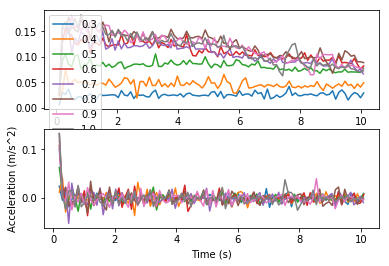

In [95]:
import numpy as np
import math

ax_vel = plt.subplot(2,1,1)
ax_acc = plt.subplot(2,1,2)
means = []
errs = []
for speed in speeds:
    x, y = coords[speed]['x'], coords[speed]['x']
    dist = np.hypot(y.diff(), x.diff())
    t = coords[speed]['t']
    dt = t.diff()
    v = dist / dt
    a = dist.diff() / dt

    # Plot velocity
    ax_vel.plot(t, v)
    plt.ylabel('Velocity (m/s)')
    plt.xlabel('Time (s)')

    # Plot acceleration
    ax_acc.plot(t, a)
    plt.ylabel('Acceleration (m/s^2)')
    plt.xlabel('Time (s)')

    v_sample = v[[i for i in range(0,len(v)) if t[i] >= 1]]
    means.append(v_sample.mean())
    errs.append(v_sample.std())

ax_vel.legend(speeds)

,Motor command,Velocity (m/s)
0,0.3,0.025537
1,0.4,0.045445
2,0.5,0.081331
3,0.6,0.110439
4,0.7,0.105930
5,0.8,0.123277
6,0.9,0.117019
7,1.0,0.114903


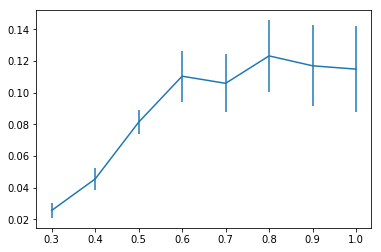

In [101]:
plt.errorbar(speeds,means,errs)
pd.DataFrame({ 'Motor command': speeds, 'Velocity (m/s)': means })